### CKIPtagger

https://github.com/ckiplab/ckiptagger/wiki/Chinese-README


In [ ]:
# check tensorflow version 
import tensorflow as tf
tf.version.VERSION

'2.7.0'

In [ ]:
# if there is problem with tensorflow

# !pip uninstall tensorflow
# !pip install tensorflow==2.7.0

In [ ]:
!pip install -U ckiptagger[tf,gdown]

In [ ]:
# Download 
!gdown --id '16jCrS27EVCOFYWWx9Z0ByFG_Y-Df7CiJ' --output data.zip
!unzip -q data.zip

Downloading...
From: https://drive.google.com/uc?id=16jCrS27EVCOFYWWx9Z0ByFG_Y-Df7CiJ
To: /content/data.zip
100% 1.88G/1.88G [00:12<00:00, 147MB/s] 


In [ ]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import os, torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Running on device: ", device)

if device == "cuda": 
  os.environ["CUDA_VISIBLE_DEVICES"] = "0"
  ws = WS("./data", disable_cuda=False)
else:
  ws = WS("./data")

Running on device:  cpu


/usr/local/lib/python3.7/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)


### Tokenize




doc_list = 敘述

label = 分類

In [ ]:
label_dict = {"奇幻冒險 ":1, "青春校園 ":2 , "溫馨 ":3, "幽默搞笑 " :4, "社會寫實 ":5,
        "科幻未來 ":6, "戀愛 ":7, "幽默搞笑 ":8, "歷史傳記 ":9, "靈異神怪 ":10 ,
        "運動競技 ":11, "料理美食 ":12, '推理懸疑 ':13, "其他 ":14 }

In [ ]:
# 合併小的class
label_dict = {"奇幻冒險 ":1, "青春校園 ":2 , "溫馨 ":3, "幽默搞笑 " :4, "社會寫實 ":5,
        "科幻未來 ":6, "戀愛 ":7, "幽默搞笑 ":8, "歷史傳記 ":9, "靈異神怪 ":5 ,
        "運動競技 ":11, "料理美食 ":12, '推理懸疑 ':5, "其他 ":5 }

**read file** 

finaltry.csv & tm crawling.csv

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

# change path
path_finaltry = '/content/gdrive/MyDrive/finaltry.csv'
path_tmcrawl = '/content/gdrive/MyDrive/tm_crawling_.csv'

Mounted at /content/gdrive


In [2]:
import pandas as pd 
df=pd.read_csv(path_finaltry)
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)

In [4]:
df

id  \
0        0   
1        1   
2        2   
3        3   
4        4   
5        5   
6        6   
7        7   
8        8   
9        9   
10      10   
11      11   
12      12   
13      13   
14      14   
15      15   
16      16   
17      17   
18      18   
19      19   
20      20   
21      21   
22      22   
23      23   
24      24   
25      25   
26      26   
27      27   
28      28   
29      29   
30      30   
31      31   
32      32   
33      33   
34      34   
35      35   
36      36   
37      37   
38      38   
39      39   
40      40   
41      41   
42      42   
43      43   
44      44   
45      45   
46      46   
47      47   
48      48   
49      49   
50      50   
51      51   
52      52   
53      53   
54      54   
55      55   
56      56   
57      57   
58      58   
59      59   
60      60   
61      61   
62      62   
63      63   
64      64   
65      65   
66      66   
67      67   
68      68   
69      69   
70      70   
71      71   
72      72   
73      73   
74      74   
75      75   
76      76   
77      77   
78      78   
79      79   
80      80   
81      81   
82      82   
83      83   
84      84   
85      85   
86      86   
87      87   
88      88   
89      89   
90      90   
91      91   
92      92   
93      93   
94      94   
95      95   
96      96   
97      97   
98      98   
99      99   
100    100   
101    101   
102    102   
103    103   
104    104   
105    105   
106    106   
107    107   
108    108   
109    109   
110    110   
111    111   
112    112   
113    113   
114    114   
115    115   
116    116   
117    117   
118    118   
119    119   
120    120   
121    121   
122    122   
123    123   
124    124   
125    125   
126    126   
127    127   
128    128   
129    129   
130    130   
131    131   
132    132   
133    133   
134    134   
135    135   
136    136   
137    137   
138    138   
139    139   
140    140   
141    141   
142    142   
143    143   
144    144   
145    145   
146    146   
147    147   
148    148   
149    149   
150    150   
151    151   
152    152   
153    153   
154    154   
155    155   
156    156   
157    157   
158    158   
159    159   
160    160   
161    161   
162    162   
163    163   
164    164   
165    165   
166    166   
167    167   
168    168   
169    169   
170    170   
171    171   
172    172   
173    173   
174    174   
175    175   
176    176   
177    177   
178    178   
179    179   
180    180   
181    181   
182    182   
183    183   
184    184   
185    185   
186    186   
187    187   
188    188   
189    189   
190    190   
191    191   
192    192   
193    193   
194    194   
195    195   
196    196   
197    197   
198    198   
199    199   
200    200   
201    201   
202    202   
203    203   
204    204   
205    205   
206    206   
207    207   
208    208   
209    209   
210    210   
211    211   
212    212   
213    213   
214    214   
215    215   
216    216   
217    217   
218    218   
219    219   
220    220   
221    221   
222    222   
223    223   
224    224   
225    225   
226    226   
227    227   
228    228   
229    229   
230    230   
231    231   
232    232   
233    233   
234    234   
235    235   
236    236   
237    237   
238    238   
239    239   
240    240   
241    241   
242    242   
243    243   
244    244   
245    245   
246    246   
247    247   
248    248   
249    249   
250    250   
251    251   
252    252   
253    253   
254    254   
255    255   
256    256   
257    257   
258    258   
259    259   
260    260   
261    261   
262    262   
263    263   
264    264   
265    265   
266    266   
267    267   
268    268   
269    269   
270    270   
271    271   
272    272   
273    273   
274    274   
275    275   
276    276   
277    277   
278    278   
279    279   
280    280   
281    281   
282    282   
283    283   
284    284   
285 

In [ ]:
df_label = pd.read_csv(path_tmcrawl)
df_label

Unnamed: 0                           作品名稱     類型   評分     人氣
0              0                       鬼滅之刃 遊郭篇  奇幻冒險   4.9  47233
1              1  名偵探柯南 警察學校篇 Wild Police Story  青春校園     5      7
2              2     水星領航員 ARIA The BENEDIZIONE    溫馨    --     10
3              3                          扶桑花之舞    溫馨    --     14
4              4                 JOJO 的奇妙冒險 石之海  奇幻冒險   4.8     54
...          ...                            ...    ...  ...    ...
3025        3025                   一騎當千 集鍔鬥士血風錄    其他   3.5     94
3026        3026  闇龍紀元 -Holy war of blood mage-  奇幻冒險   3.3     34
3027        3027                   SMILE 光之美少女！  奇幻冒險   4.2    103
3028        3028              烙印勇士 黃金時代篇 1 霸王之卵  奇幻冒險   4.4    155
3029        3029        黑岩射手 BLACK★ROCK SHOOTER  奇幻冒險   4.1   5255

[3030 rows x 5 columns]

選擇 '角色描述' 或 '背景描述' 來訓練

In [ ]:
!pip install opencc-python-reimplemented
from opencc import OpenCC

cc = OpenCC('s2tw')

     |████████████████████████████████| 484 kB 5.1 MB/s 
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486152 sha256=0f21c715c2d69ad4cd9d8fa435142d50cb2340b062bef29ff77975b66a1c4549
  Stored in directory: /root/.cache/pip/wheels/4e/e2/60/d062d260be08788bb389521544a8fc173de9a9a78d6a593344
Successfully built opencc-python-reimplemented


In [ ]:
content = '背景描述' #'角色描述'  # 
doc_list = [] #背景用(資料筆數990)
label = []  #背景用(資料筆數990)

doc_list_for_rating = [] #評分用(資料筆數963)
label_rating_list = [] #評分用(資料筆數963)
count =0
for index, row in df.iterrows():
  # if count >10:
  #   break
  if not pd.isnull(row[content]): 
    cont = cc.convert(row[content])
    # print(cont)
    if cont != '此章節需要擴充。':
      doc_list.append(cont)
      id = row['id']
      label_name = df_label.iloc[id]['類型']
      label.append(label_dict[label_name]) #
      ### 評分
      if df_label.iloc[id]['評分'] != '--':
        doc_list_for_rating.append(cont)
        label_rating_list.append(df_label.iloc[id]['評分']) 
  # count +=1
print("剩餘資料筆數for背景 ", len(doc_list), len(label)) # , doc_list[:8]
print("剩餘資料筆數for評分 ", len(doc_list_for_rating), len(label_rating_list))
# print(len(label), label[:8])
#label_rating_list

剩餘資料筆數for背景  990 990
剩餘資料筆數for評分  963 963


check class 分布 (可以不用執行)

In [ ]:
#print(corpus[0].replace("\n", ""))

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-01-14 07:43:15--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.193.113, 172.217.193.138, 172.217.193.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdqovl6n3bsab0o5sgj64b7gcvk9n6a7/1642146150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-14 07:43:18--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sdqovl6n3bsab0o5sgj64b7gcvk9n6a7/1642146150000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|10

[302, 48, 70, 0, 127, 119, 126, 132, 11, 0, 45, 10, 0]


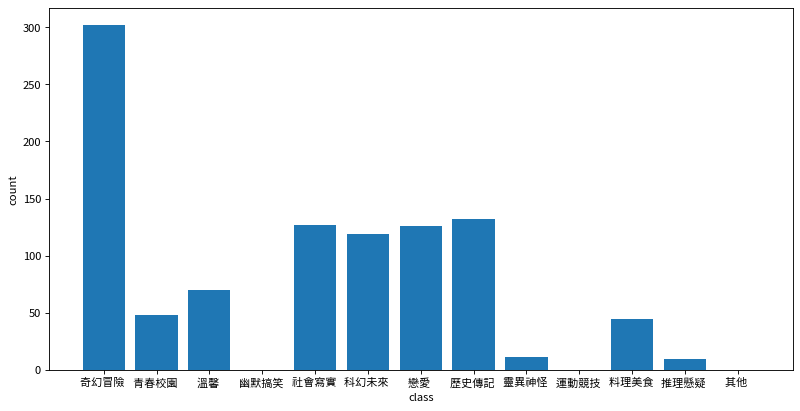

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
label_count = []
for i in range(1,14):
  label_count.append(label.count(i))
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
print(label_count)
x = np.arange(1,1+len(label_count))
# print(x)
plt.xticks(x, label_dict.keys())
plt.bar(x, label_count)
plt.xlabel('class')
plt.ylabel('count')
plt.show()

### [Build tfidf](https://br19920702.medium.com/%E7%B9%81%E4%B8%AD%E9%97%9C%E9%8D%B5%E5%AD%97%E8%90%83%E5%8F%96-extract-keywords-%E9%81%8B%E7%94%A8-ckiptagger-%E8%88%87-scikit-learn-boom%E5%87%BA%E6%96%B0%E5%97%9E%E5%91%B3-3ec3e681bdec)


In [ ]:
# after readlines
import re

drop_sth_doc_list = []
for i in doc_list:
  clean_c = re.sub('[【】《》「」]☆★◆Δ【】', '', i)
  if len(clean_c) > 0:
      drop_sth_doc_list.append(clean_c)

word_doc_list = ws(
    drop_sth_doc_list,
    sentence_segmentation = True, # To consider delimiters
    segment_delimiter_set = {'?', '？', '!', '！', '。', '.', ',', '，', ';', ':', '、','~','～'}, # This is the default set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
    # coerce_dictionary = dictionary2, # words in this dictionary are forced
    )
print(word_doc_list)

corpus = []
for doc in word_doc_list:
  corpus.append(' '.join(doc))



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(corpus[:2])

['在 東 日本 大地震 發生 的 10 年 後 ， 富士 電視臺 將 與 Aniplex 合作 ， 製作 以 震災 災區 巖手縣 、 宮城縣 和 福島縣 為 故事 背景 的 三 部 作品 ， 該 企劃 定名為 「 永遠 應援 。 Project 2011＋10 … 」 （ ず っ と お う え ん 。 プ ロ ジ ェ ク ト 2011＋10 … ） ， 作品 包括 《 扶桑花 之 舞 》 、 《 海岬 的 迷途 之 家 》 以及 電視 動畫 《 後空 翻 少年 ！ ！ 》 [1 ][2 ][3] 。 《 扶桑花 之 舞 》 以 福島縣 磐城市 為 故事 舞臺 ， 當地 以 大型 娛樂 設施 夏威夷 溫泉 渡假村 （ 日語 ： ス パ リ ゾ ー ト ハ ワ イ ア ン ズ ） 知名 ， 其中 草裙 舞團 「 扶桑花 女孩 」 最為 著名 。 故事 主角 夏凪 日羽 與 她 的 朋友 們 將 以 成為 扶桑花 女孩 努力 [ 1 ] 。', '故事 講述 一 個 住 在 哥倫比亞 山區 的 迷人 小鎮 的 馬瑞格 （ Madrigal ） 一 家 ， 家 中 除了 米拉貝兒 （ Mirabel ） 之外 每 個 孩子 都 擁有 奇異 的 魔力 ， 例如 力 大 無窮 或 治癒 能力 等 。']


In [ ]:
with open('/content/gdrive/MyDrive/bg_corpus.txt', 'w') as f:
    for item in corpus:
        f.write("%s\n" % item.replace("\n", " "))

In [ ]:
corpus1 = []
with open('/content/gdrive/MyDrive/bg_corpus.txt') as file:
    for line in file:
        corpus1.append(line)

In [ ]:
print(len(corpus))
print(len(corpus1))
print(corpus[0])
print()
print(corpus1[0])

print(len(corpus[0]))
print(len(corpus1[0]))

990
990
在 東 日本 大地震 發生 的 10 年 後 ， 富士 電視臺 將 與 Aniplex 合作 ， 製作 以 震災 災區 巖手縣 、 宮城縣 和 福島縣 為 故事 背景 的 三 部 作品 ， 該 企劃 定名為 「 永遠 應援 。 Project 2011＋10 … 」 （ ず っ と お う え ん 。 プ ロ ジ ェ ク ト 2011＋10 … ） ， 作品 包括 《 扶桑花 之 舞 》 、 《 海岬 的 迷途 之 家 》 以及 電視 動畫 《 後空 翻 少年 ！ ！ 》 [1 ][2 ][3] 。 《 扶桑花 之 舞 》 以 福島縣 磐城市 為 故事 舞臺 ， 當地 以 大型 娛樂 設施 夏威夷 溫泉 渡假村 （ 日語 ： ス パ リ ゾ ー ト ハ ワ イ ア ン ズ ） 知名 ， 其中 草裙 舞團 「 扶桑花 女孩 」 最為 著名 。 故事 主角 夏凪 日羽 與 她 的 朋友 們 將 以 成為 扶桑花 女孩 努力 [ 1 ] 。

在 東 日本 大地震 發生 的 10 年 後 ， 富士 電視臺 將 與 Aniplex 合作 ， 製作 以 震災 災區 巖手縣 、 宮城縣 和 福島縣 為 故事 背景 的 三 部 作品 ， 該 企劃 定名為 「 永遠 應援 。 Project 2011＋10 … 」 （ ず っ と お う え ん 。 プ ロ ジ ェ ク ト 2011＋10 … ） ， 作品 包括 《 扶桑花 之 舞 》 、 《 海岬 的 迷途 之 家 》 以及 電視 動畫 《 後空 翻 少年 ！ ！ 》 [1 ][2 ][3] 。 《 扶桑花 之 舞 》 以 福島縣 磐城市 為 故事 舞臺 ， 當地 以 大型 娛樂 設施 夏威夷 溫泉 渡假村 （ 日語 ： ス パ リ ゾ ー ト ハ ワ イ ア ン ズ ） 知名 ， 其中 草裙 舞團 「 扶桑花 女孩 」 最為 著名 。 故事 主角 夏凪 日羽 與 她 的 朋友 們 將 以 成為 扶桑花 女孩 努力 [ 1 ] 。

423
424


In [ ]:
with open('/content/gdrive/MyDrive/bg_class11.txt', 'w') as f:
    for item in label:
        f.write(str(item)+'\n')

In [ ]:
label1 = []
with open('/content/gdrive/MyDrive/bg_class11.txt') as file:
    for line in file:
        class_ = int(line)
        label1.append(class_)

In [ ]:
print(label)
print(label1)
print(label[0])
print(type(label[0]))
print(len(label), len(label1))

[3, 1, 6, 1, 7, 5, 1, 7, 6, 1, 1, 1, 1, 2, 1, 7, 1, 5, 3, 2, 3, 1, 1, 6, 8, 1, 1, 8, 2, 5, 1, 1, 7, 5, 6, 11, 1, 2, 2, 1, 7, 1, 3, 1, 6, 6, 6, 3, 5, 7, 1, 1, 2, 6, 3, 5, 1, 2, 7, 7, 7, 11, 8, 1, 6, 3, 6, 5, 1, 6, 5, 1, 6, 3, 5, 1, 5, 1, 5, 5, 2, 1, 1, 2, 1, 8, 2, 5, 1, 1, 8, 3, 1, 1, 1, 1, 3, 5, 7, 1, 1, 8, 6, 1, 1, 1, 11, 6, 5, 1, 7, 1, 5, 1, 1, 1, 1, 1, 5, 6, 1, 7, 7, 7, 1, 5, 1, 1, 1, 1, 11, 1, 2, 2, 1, 1, 6, 5, 6, 3, 1, 11, 5, 1, 7, 1, 1, 5, 1, 2, 2, 8, 1, 5, 7, 8, 7, 5, 1, 1, 8, 2, 1, 2, 1, 1, 6, 5, 1, 2, 1, 7, 12, 1, 2, 5, 6, 1, 7, 8, 8, 9, 1, 1, 8, 7, 11, 1, 6, 8, 1, 1, 11, 5, 3, 1, 6, 7, 8, 1, 7, 1, 1, 9, 5, 2, 1, 2, 1, 1, 1, 6, 11, 8, 8, 1, 1, 1, 7, 2, 1, 6, 1, 8, 5, 5, 3, 1, 6, 8, 6, 7, 11, 5, 6, 1, 7, 2, 8, 1, 7, 8, 7, 8, 6, 6, 3, 3, 6, 1, 1, 3, 1, 7, 5, 7, 7, 6, 5, 1, 3, 7, 8, 1, 7, 8, 5, 2, 3, 1, 8, 1, 6, 1, 5, 1, 7, 7, 8, 3, 3, 9, 1, 1, 1, 1, 6, 11, 7, 8, 7, 2, 11, 7, 5, 6, 1, 11, 1, 1, 5, 7, 1, 1, 3, 5, 1, 2, 3, 8, 7, 1, 9, 5, 1, 5, 11, 1, 3, 1, 1, 8, 11, 11, 8, 1, 5, 5,

 [Stop words](https://github.com/FontTian/NLP_tools/blob/master/NLP/stopwords/stopwords1893.txt
)

In [ ]:
# stopword txt file 
# 哈爾濱工業大學 1893個中文與非中文stopwords集 
!gdown --id '1HCF0RLMwy06XZgejQEelCY0NyUBRAn6o'

with open('./stopwords1893.txt', encoding='utf-8') as f:
  stop_word = f.read()
sw = stop_word.split('\n')

Downloading...
From: https://drive.google.com/uc?id=1HCF0RLMwy06XZgejQEelCY0NyUBRAn6o
To: /content/stopwords1893.txt
100% 13.3k/13.3k [00:00<00:00, 13.0MB/s]


### [Build tfidf](https://br19920702.medium.com/%E7%B9%81%E4%B8%AD%E9%97%9C%E9%8D%B5%E5%AD%97%E8%90%83%E5%8F%96-extract-keywords-%E9%81%8B%E7%94%A8-ckiptagger-%E8%88%87-scikit-learn-boom%E5%87%BA%E6%96%B0%E5%97%9E%E5%91%B3-3ec3e681bdec)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# max_df: ignore terms that have a document frequency (比率或次數) higher than the given threshold

text_cv = CountVectorizer(max_df=0.8, min_df=5, stop_words=sw)  #
td_matrix = text_cv.fit_transform(corpus)

print (td_matrix.shape)
print (text_cv.vocabulary_.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  % sorted(inconsistent)


(990, 5553)
dict_keys(['日本', '發生', '10', '富士', '電視臺', '合作', '製作', '故事', '背景', '作品', '企劃', '永遠', 'project', '包括', '電視', '動畫', '少年', '舞臺', '大型', '娛樂', '設施', '溫泉', '日語', '知名', '女孩', '最為', '著名', '主角', '朋友', '努力', '講述', '小鎮', '之外', '孩子', '擁有', '奇異', '魔力', '無窮', '治癒', '能力', '2019年', '平行', '世界', '入侵', '時代', '征服', '淪為', '漫畫', '偶像', '文化', '斷絕', '祕密', '結社', '守護', '發起', '挑戰', '主力', '兵器', '人偶', '少女', '戰士', '稱為', '豆子', '搭上', '無限', '列車', '煉獄', '見面', '協助', '殺死', '潛伏', '惡鬼', '攻擊', '輕鬆', '指使', '乘客', '繩子', '摧毀', '位在', '精神', '核心', '長眠', '承諾', '享受', '沉睡', '期間', '已故', '家人', '團聚', '情人', '約會', '夥伴', '洞窟', '探險', '夢見', '父親', '弟弟', '發現', '試圖', '喚醒', '清醒', '繩索', '手下', '使命', '溫暖', '感動', '對戰', '施術', '睡著', '對決', '本體', '融合', '尋找', '脖子', '保護', '找到', '斬殺', '現身', '襲擊', '負傷', '救出', '欣賞', '實力', '提出', '提議', '拒絕', '身受', '致命傷', '困住', '打算', '利用', '陽光', '逃亡', '阻止', '成員', '得知', '逝世', '前輩', '個性', '擅長', '照顧', '後輩', '五十', '雙葉', '上班', '第一', '誤以為', '身材', '中學生', '印象', '上司', '指派', '指導', '之間', '戀愛', '喜劇', '英國', '倫敦', '目標', '謎樣', '組織',

In [ ]:
tfidf = TfidfTransformer()
tfidf_matrix = tfidf.fit_transform(td_matrix)
# tfidf_matrix.toarray().shape

In [ ]:
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=text_cv.vocabulary_.keys())
tfidf_df

日本   發生        10   富士       電視臺   合作  ...   進出   攝取   近乎   遺骸   衰弱        奉為
0    0.0  0.0  0.000000  0.0  0.392111  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
1    0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
2    0.0  0.0  0.000000  0.0  0.125764  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
3    0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
4    0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
..   ...  ...       ...  ...       ...  ...  ...  ...  ...  ...  ...  ...       ...
985  0.0  0.0  0.000000  0.0  0.053062  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
986  0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
987  0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000
988  0.0  0.0  0.032418  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.022907
989  0.0  0.0  0.000000  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.000000

[990 rows x 5553 columns]

### Split Dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, label, 
                             test_size=0.3, random_state=42)

### Training

SVM

In [ ]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear', C = 3)
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)

### Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
np.set_printoptions(suppress=True)

print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.82      0.64        93
           2       0.09      0.20      0.13        10
           3       0.25      0.10      0.14        21
           5       0.50      0.27      0.35        41
           6       0.41      0.39      0.40        36
           7       0.21      0.16      0.18        31
           8       0.34      0.27      0.30        44
           9       0.00      0.00      0.00         7
          11       0.62      0.45      0.53        11
          12       1.00      0.33      0.50         3

    accuracy                           0.43       297
   macro avg       0.40      0.30      0.32       297
weighted avg       0.41      0.43      0.40       297

Accuracy: 0.43097643097643096


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


文字雲 (需要把同class的文檔組在一起)

In [ ]:
!pip install wordcloud

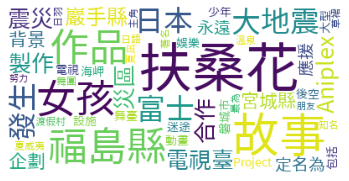

In [ ]:
# import matplotlib.pyplot as plt
# # adjust fonts for chinese words
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
# plt.rcParams['axes.unicode_minus'] = False

from wordcloud import WordCloud
font = 'TaipeiSansTCBeta-Regular.ttf'
my_wordcloud = WordCloud(background_color='white',font_path=font, stopwords = sw).generate(corpus[0])  #,mask=mask

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()


# Ignore these
---


### Jieba

https://github.com/fxsjy/jieba

In [ ]:
# !pip install jieba

In [ ]:
# read file to corpus (document list)
corpus = []

In [ ]:
import jieba
import jieba.analyse

# test
corpus = '台灣國內銀行ATM驚傳大當機，包含中信、台新、國泰在內等多家銀行ATM均無法領款，許多民眾上網崩潰求救，直呼「領不到錢」、「無法跨行提款」，目前詳細情況仍有待財金公司出面說明。'
keywords = jieba.analyse.extract_tags(corpus, topK=20, withWeight=True, allowPOS=())
print(keywords)

In [ ]:
seg_list = jieba.cut(corpus, cut_all=False)
print("/ ".join(seg_list))

In [ ]:
def stopwordslist():
  stopwords =[line.strip() for line in open('stopwords1893.txt',
                          encoding='UTF-8').readlines()]
  return stopwords

def seg_depart(sentence):
  sentence_depart = jieba.cut(sentence.strip(),HMM=False)  # Hidden Markov Model
  stopwords = stopwordslist()
  outstr = ''
  for word in sentence_depart:
    if word not in stopwords:
      if word != '\t':
        outstr += word.word
        outstr += word.flag
        outstr += " "
  return outstr

# 預測評分(線性回歸)

In [ ]:
#doc_list_for_rating #沒有降維
#label_rating_list #動漫評分



content = '背景描述' #'角色描述' 
doc_list_for_rating = []
label_rating_list = []
count =0
for index, row in df.iterrows():
  if not pd.isnull(row[content]): 
    cont = cc.convert(row[content])
    #print(cont)
    if cont != '此章節需要擴充。':
      id = row['id']
      if df_label.iloc[id]['評分'] != '--':
        doc_list_for_rating.append(cont)
        label_rating_list.append(float(df_label.iloc[id]['評分']))
  # count +=1

print("剩餘資料筆數 ", len(doc_list_for_rating), len(label_rating_list)) # , doc_list[:8]

print(label_rating_list)


剩餘資料筆數  963 963
[4.6, 4.7, 5.0, 4.8, 4.5, 4.9, 3.5, 3.9, 4.2, 4.8, 4.2, 4.7, 3.0, 2.8, 5.0, 4.9, 4.9, 4.8, 4.4, 4.0, 4.5, 3.5, 4.8, 4.7, 4.7, 3.2, 4.2, 4.2, 4.9, 4.0, 4.6, 4.8, 4.5, 4.9, 4.6, 4.8, 4.6, 4.0, 5.0, 3.2, 4.7, 4.9, 4.3, 3.5, 4.5, 4.5, 4.8, 4.9, 4.7, 4.9, 4.6, 4.6, 4.6, 4.1, 3.5, 3.9, 3.6, 4.8, 5.0, 4.8, 4.5, 4.0, 4.0, 4.6, 3.7, 4.4, 3.8, 4.8, 3.3, 4.0, 3.6, 4.5, 4.8, 4.6, 4.9, 4.7, 3.7, 3.8, 4.0, 4.8, 2.6, 4.5, 4.3, 3.3, 5.0, 4.4, 4.5, 3.3, 4.4, 4.1, 4.2, 4.2, 4.7, 3.9, 4.9, 4.7, 4.4, 4.8, 3.7, 4.5, 4.4, 4.5, 4.8, 4.6, 4.1, 4.7, 4.9, 4.9, 4.7, 4.5, 3.7, 4.1, 4.2, 5.0, 4.1, 4.7, 2.8, 4.8, 4.7, 4.7, 4.5, 4.6, 4.8, 2.5, 4.9, 3.0, 4.6, 4.1, 3.5, 4.4, 4.2, 4.9, 3.2, 3.7, 4.7, 4.8, 4.8, 4.3, 4.0, 4.7, 4.5, 2.4, 4.0, 4.8, 4.6, 4.9, 2.8, 4.9, 4.8, 4.8, 4.0, 4.7, 4.8, 4.9, 4.7, 4.9, 4.8, 4.9, 3.5, 4.9, 4.3, 4.6, 4.7, 4.2, 2.1, 3.3, 4.8, 4.6, 3.4, 4.1, 3.1, 4.8, 4.7, 4.0, 3.8, 4.8, 4.8, 4.7, 4.5, 2.0, 4.7, 4.9, 4.2, 3.8, 4.5, 4.5, 4.7, 4.2, 4.5, 4.9, 4.7, 2.4, 4.6, 4.4, 3.7, 4.7, 4.5

In [ ]:
## 跟前面一樣的操作，但
import re


drop_sth_doc_list = []
for i in doc_list_for_rating:
  clean_c = re.sub('[【】《》「」]☆★◆Δ【】', '', i)
  if len(clean_c) > 0:
      drop_sth_doc_list.append(clean_c)

print(len(drop_sth_doc_list))

word_doc_list = ws(
    drop_sth_doc_list,
    sentence_segmentation = True, # To consider delimiters
    segment_delimiter_set = {'?', '？', '!', '！', '。', '.', ',', '，', ';', ':', '、','~','～'}, # This is the default set of delimiters
    # recommend_dictionary = dictionary1, # words in this dictionary are encouraged
    # coerce_dictionary = dictionary2, # words in this dictionary are forced
    )
print(word_doc_list)

corpus_for_rating = []
for doc in word_doc_list:
  corpus_for_rating.append(' '.join(doc))

print(len(corpus_for_rating))

963


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(corpus_for_rating[:2])

['2019年 ， 日本 遭到 來自 平行 世界 的 軍國主義 「 真國 日本 」 入侵 ， 未 能 進入 令 和 時代 即 被 征服 。 時 至 10 年 後 的 2029年 ， 日本 已 淪為 真國 日本 的 附屬國 「 幻國 日本 」 ， 曾經 興盛 一時 的 動畫 、 漫畫 、 偶像 等 亞 文化 也 完全 斷絕 。 但 祕密 結社 「 荒霸吐 」 [ 註  1] 為了 守護 亞 文化 而 向 真國 發起 挑戰 ， 他們 的 主力 兵器 「 伽藍 人偶 」 則 是 以 少女 戰士 為 動力源 ， 這些 少女 被 稱為 「 電池 少女 」 。', '炭治郎 帶 著 禰 豆子 與 善逸 、 伊之助 搭上 無限 列車 ， 與 「 炎柱 」 煉獄 杏壽郎 見面 ， 協助 他 殺死 潛伏 在 列車 上 的 惡鬼 。 上車 不久 後 ， 他們 遭到 幾 隻 鬼 攻擊 ， 杏壽郎 輕鬆 將 其 殺死 ， 但 在 車長 檢查完 車票 後 ， 一 行 人 呼呼 大睡 ， 此 為 潛伏 在 列車 上 的 「 下弦 之 壹 」 魘夢 的 能力 ， 他 指使 四 個 乘客 在 炭治郎 等 人 手 上 綁 繩子 ， 藉 此 進入 他們 夢 中 ， 摧毀 位在 夢 中 的 精神 核心 ， 一旦 核心 被 毀 ， 做夢 者 便 就此 長眠 。 魘夢 承諾 那些 乘客 在 事成 之後 能 讓 他們 享受 美 夢 。 在 沉睡 期間 ， 炭治郎 在 夢 中 與 已故 家人 團聚 ， 善逸 在 與 夢 中 情人 禰 豆子 約會 ， 伊之助 在 夢 裡 與 他 的 夥伴 們 進行 洞窟 探險 ， 而 杏壽郎 則 夢見 了 他 的 父親 及 弟弟 。 炭治郎 發現 自己 在 做夢 後 試圖 喚醒 自己 ， 他 發現 在 夢 中 自刎 便 可 清醒 ， 同時 ， 禰 豆子 使用 血鬼術 燒斷 繩索 ， 喚醒 魘夢 手下 ， 他們 為 達 使命 便 開始 攻擊 炭治郎 ， 但 皆 被 炭治郎 擊昏 。 其中 ， 進入 炭治郎 夢 中 的 那 個 人 被 炭治郎 溫暖 的 精神 世界 所 感動 ， 並 未 攻擊 炭治郎 。 禰 豆子 叫醒 善逸 等 人 ， 而 炭治郎 在 車頂 上 與 魘夢 對戰 ， 魘夢 不斷 施術 讓 炭治郎 睡著 ， 而 炭治郎 不斷 在 夢 中 自刎 ， 直到 他 將 魘夢斬首

In [ ]:
with open('/content/gdrive/MyDrive/rating_corpus.txt', 'w') as f:
    for item in corpus_for_rating:
        f.write("%s\n" % item.replace("\n", " "))



In [ ]:
corpus_for_rating1 = []
with open('/content/gdrive/MyDrive/rating_corpus.txt') as file:
    for line in file:
        corpus_for_rating1.append(line)

In [ ]:
text_cv = CountVectorizer(max_df=0.8, min_df=5, stop_words=sw)  #
td_matrix_for_rating = text_cv.fit_transform(corpus_for_rating)

print (td_matrix_for_rating.shape)
print(type(td_matrix_for_rating))

import numpy as np
from scipy.sparse import csr_matrix

# a = td_matrix_for_rating.tolil()
# print(a)
print (text_cv.vocabulary_.keys())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'] not in stop_words.
  % sorted(inconsistent)


(963, 5496)
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 2)	1
  (0, 54)	1
  (0, 368)	1
  (0, 396)	1
  (0, 477)	1
  (0, 682)	1
  (0, 767)	1
  (0, 820)	1
  (0, 1023)	1
  (0, 1702)	1
  (0, 1841)	3
  (0, 1968)	1
  (0, 2080)	1
  (0, 2287)	1
  (0, 2423)	1
  (0, 2699)	2
  (0, 2723)	1
  (0, 2759)	5
  (0, 2787)	1
  (0, 3198)	1
  (0, 3258)	1
  (0, 3629)	1
  (0, 3769)	1
  (0, 3832)	1
  (0, 4012)	1
  (1, 368)	1
  (1, 426)	3
  (1, 474)	1
  (1, 544)	1
  (1, 579)	1
  (1, 622)	1
  (1, 917)	5
  (1, 927)	1
  (1, 1076)	1
  (1, 1294)	2
  (1, 1346)	1
  (1, 1376)	1
  (1, 1493)	1
  (1, 1494)	1
  (1, 1735)	1
  (1, 1760)	1
  (1, 1798)	1
  (1, 1803)	2
  (1, 1806)	1
  (1, 1916)	1
  (1, 2042)	1
  (1, 2097)	1
  (1, 2176)	1
  (1, 2192)	1
  (1, 2223)	1
  (1, 2267)	1
  (1, 2317)	1
  (1, 2335)	1
  (1, 2346)	1
  (1, 2353)	1
  (1, 2387)	1
  (1, 2411)	1
  (1, 2465)	1
  (1, 2499)	1
  (1, 2506)	1
  (1, 2538)	1
  (1, 2547)	1
  (1, 2628)	3
  (1, 2656)	1
  (1, 2709)	2
  (1, 2735)	1
  (1, 2870)	2
  (1, 2888)	2
  (1, 2919)	2
  (

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(td_matrix_for_rating, label_rating_list, 
                             test_size=0.3, random_state=42)
# #print(x_train)
# #print(x_test)
# print(y_train)
# y_test

from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)

lm.fit(x_train, y_train)


y_test_list = []
for rate in y_test: 
  y_test_list.append(rate)
  #print(rate)
#predict_y

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

# summary(lm)

predict_y = lm.predict(x_test)
# predict_y

y_test_array = np.array(y_test_list)
print(y_test_array)
print(np.array(y_test_list).shape)
print(type(np.array(y_test_list)))
print(len(np.array(y_test_list)))

print(predict_y)

predict_y_adjusted = []
for rate in predict_y:
  if rate > 5:
    predict_y_adjusted.append(5)
  else:
    predict_y_adjusted.append(rate)

print(type(np.array(predict_y_adjusted)))
print(len(np.array(predict_y_adjusted)))
print(type(predict_y))
print(predict_y.shape)
print(len(predict_y))


print(np.array(predict_y_adjusted))

from sklearn.metrics import explained_variance_score
score = explained_variance_score(np.array(y_test_list), np.array(predict_y_adjusted))
score

### 模型績效
mse = np.mean((lm.predict(x_test) - y_test) ** 2)
print("mse: ", mse)
r_squared = lm.score(x_test, y_test)
print("r_squared: ", r_squared)
#lm.score(np.array(y_test_list), predict_y)
# print("Accuracy:", accuracy_score(y_test_list, predict_y))

[-0.00896869 -0.0219672   0.04925812 ... -0.01084769 -0.00538046
 -0.06459736]
3.927569819970578
[4.9 4.9 2.6 4.8 4.7 4.6 4.5 4.8 4.5 5.  3.8 4.8 4.8 4.3 4.3 4.6 4.6 4.4
 1.  4.4 4.9 4.5 2.9 4.3 4.8 4.7 4.9 4.8 4.5 3.6 4.6 4.9 3.  3.3 2.6 3.4
 4.2 4.8 3.4 4.2 3.4 3.2 4.6 3.  3.5 4.6 4.7 4.8 4.5 4.8 4.3 4.7 4.1 4.7
 3.8 4.8 4.7 4.5 4.  3.7 4.7 4.8 3.3 3.8 4.1 4.7 4.6 4.3 4.5 4.  4.4 4.2
 4.8 3.8 3.7 4.5 4.4 3.  3.8 2.8 4.3 4.  4.4 4.5 4.6 4.3 4.2 4.2 4.4 4.4
 3.8 4.5 4.6 4.5 4.5 4.7 4.2 4.8 2.8 4.5 4.4 4.3 4.7 4.8 3.4 4.  4.  3.9
 4.8 4.4 4.5 4.7 4.2 4.  4.8 4.1 4.5 4.  4.2 4.7 4.3 4.6 4.5 4.2 4.4 4.5
 4.4 3.8 5.  4.7 4.  4.1 4.4 4.  4.5 4.4 3.7 3.6 4.8 4.1 4.4 4.3 4.6 4.7
 4.7 4.4 4.5 4.6 4.3 4.7 4.3 4.3 4.  4.8 4.1 3.4 3.8 4.9 4.3 4.  3.7 3.8
 4.6 4.  3.9 4.3 3.5 4.4 2.4 4.8 4.6 4.9 4.1 4.5 4.9 3.8 4.7 4.1 4.9 3.3
 4.5 3.8 4.5 4.4 2.  4.6 3.7 4.8 3.5 4.9 4.8 4.6 3.5 3.7 3.6 3.7 4.7 4.5
 3.8 3.6 4.8 4.3 4.6 4.  4.  2.9 4.7 4.  5.  4.5 4.4 4.8 1.  2.8 4.9 3.5
 3.5 3.8 3.2 3.6 4.8 3.5 4.

串流輸出內容已截斷至最後 5000 行。
  (0, 5395)	1
  (0, 4567)	2
  (0, 2743)	1
  (0, 3317)	1
  (0, 162)	1
  (0, 4641)	1
  (0, 1998)	1
  (0, 3147)	1
  (0, 1895)	1
  (0, 3239)	1
  (0, 2392)	1
  (0, 3620)	1
  (0, 4129)	1
  (0, 782)	1
  (0, 5080)	1
  (0, 528)	1
  (0, 934)	1
  (0, 909)	1
  (0, 1591)	1
  (0, 356)	1
  (0, 4099)	1
  (0, 2562)	4
  (0, 2262)	1
  (0, 4943)	1
  (0, 5417)	1
  (0, 1202)	1
  (0, 4594)	1
  (0, 2222)	1
  (0, 1365)	1
  (0, 4911)	1
  (0, 1975)	1
  (0, 1688)	1
  (0, 4894)	1
  (0, 736)	1
  (0, 1502)	2
  (0, 3382)	2
  (0, 2489)	1
  (0, 4271)	1
  (0, 4886)	1
  (0, 4941)	1
  (0, 2162)	1
  (0, 5308)	1
  (0, 4242)	1
  (0, 4617)	1
  (0, 2670)	1
  (0, 3680)	2
  (0, 1543)	2
  (0, 2132)	2
  (0, 415)	1
  (0, 1738)	1
  (0, 4130)	2
  (0, 1692)	1
  (0, 3258)	1
  (0, 3622)	1
  (0, 2647)	1
  (0, 4249)	1
  (0, 1820)	1
  (0, 3514)	1
  (0, 565)	1
  (0, 1203)	1
  (0, 4443)	1
  (0, 2900)	1
  (0, 4487)	1
  (0, 1579)	1
  (0, 1675)	1
  (0, 551)	1
  (0, 3704)	1
  (0, 4293)	1
  (0, 1627)	1
  (0, 3258)	1
  (0, 184